In [1]:
# import necessary libraries
import pandas as pd
from datetime import timedelta, date, datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data
hist_weat = pd.read_csv('weather 01.2019 till 12.2020.csv',index_col=0)

In [4]:
weather.head()

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,visibility,ozone
0,1546383600,3.20,-2.58,0.01,0.80,NaN,9.3,18.49,270.0,0.75,10.003,NaN
1,1546387200,2.20,-3.74,0.01,0.85,NaN,8.8,NaN,260.0,0.75,10.003,NaN
2,1546390800,2.20,-3.16,-1.01,0.79,NaN,7.2,NaN,240.0,0.75,10.003,NaN
3,1546394400,1.20,-4.46,0.01,0.92,NaN,7.2,NaN,240.0,0.75,2.003,NaN
4,1546398000,0.22,-5.72,0.01,0.99,NaN,7.2,NaN,240.0,0.75,1.498,NaN


In [5]:
# change the time format
weather['time'] = weather['time'].apply(lambda time_stamp : datetime.utcfromtimestamp(time_stamp))
weather['time'] = pd.to_datetime(weather['time'],format = '%Y-%m-%d %H:%M:%S')

In [6]:
weather.head()

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,visibility,ozone
0,2019-01-01 23:00:00,3.20,-2.58,0.01,0.80,NaN,9.3,18.49,270.0,0.75,10.003,NaN
1,2019-01-02 00:00:00,2.20,-3.74,0.01,0.85,NaN,8.8,NaN,260.0,0.75,10.003,NaN
2,2019-01-02 01:00:00,2.20,-3.16,-1.01,0.79,NaN,7.2,NaN,240.0,0.75,10.003,NaN
3,2019-01-02 02:00:00,1.20,-4.46,0.01,0.92,NaN,7.2,NaN,240.0,0.75,2.003,NaN
4,2019-01-02 03:00:00,0.22,-5.72,0.01,0.99,NaN,7.2,NaN,240.0,0.75,1.498,NaN


In [7]:
# drop duplicate time values
# create checkpoint
weath_no_dupl = weather.drop_duplicates(subset='time')

In [8]:
weath_no_dupl.shape

(17390, 12)

In [9]:
weath_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17390 entries, 0 to 2231
Data columns (total 12 columns):
time                   17390 non-null datetime64[ns]
temperature            17390 non-null float64
apparentTemperature    17390 non-null float64
dewPoint               17390 non-null float64
humidity               17390 non-null float64
pressure               14571 non-null float64
windSpeed              17219 non-null float64
windGust               14639 non-null float64
windBearing            17205 non-null float64
cloudCover             16384 non-null float64
visibility             17360 non-null float64
ozone                  14571 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 1.7 MB


In [10]:
weath_no_dupl.describe()

,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,visibility,ozone
count,17390.000000,17390.000000,17390.000000,17390.00000,14571.000000,17219.000000,14639.000000,17205.000000,16384.000000,17360.000000,14571.000000
mean,10.625989,9.507639,5.564855,0.73739,1016.329229,3.001180,4.971450,197.009532,0.606218,14.366648,316.564100
std,8.550065,9.748583,7.411995,0.17283,8.314337,1.865763,3.408675,93.080742,0.352433,3.522671,40.309054
min,-9.790000,-15.250000,-16.120000,0.08000,985.600000,0.000000,0.390000,0.000000,0.000000,0.049000,223.400000
25%,3.910000,1.420000,-0.250000,0.62000,1011.400000,1.560000,2.320000,109.000000,0.280000,16.093000,286.800000
50%,10.035000,10.035000,5.340000,0.78000,1016.100000,2.560000,4.010000,222.000000,0.750000,16.093000,311.900000
75%,17.280000,17.350000,11.790000,0.88000,1021.800000,4.040000,6.790000,266.000000,0.950000,16.093000,341.300000
max,34.690000,34.690000,21.130000,1.00000,1046.800000,21.100000,26.810000,359.000000,1.000000,16.093000,480.100000


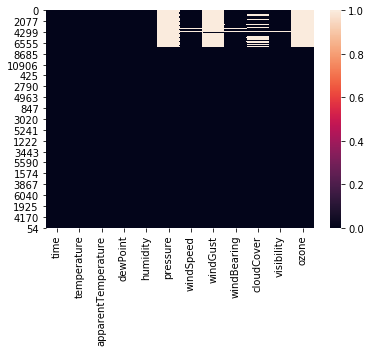

In [11]:
# visualize missing data points
sns.heatmap(weath_no_dupl.isna());

In [12]:
# compare ozone levels between years
# if the difference is not drastic, substitute missing data in 2019 with data from 2020
weath_2019 = weath_no_dupl.copy()
weath_2019['year'] = weath_2019['time'].apply(lambda x: x.year)
weath_2019 = weath_2019[weath_2019['year']==2019][['time','ozone']]
weath_2019['month_day_hour'] = weath_2019['time'].apply(lambda x: str(x.month)+'_'+str(x.day)+'_'+str(x.hour))
weath_2020 = weath_no_dupl.copy()
weath_2020['year'] = weath_2020['time'].apply(lambda x: x.year)
weath_2020 = weath_2020[weath_2020['year']==2020][['time','ozone']]
weath_2020['month_day_hour'] = weath_2020['time'].apply(lambda x: str(x.month)+'_'+str(x.day)+'_'+str(x.hour))
ozone = pd.merge(weath_2019,weath_2020, on='month_day_hour')
ozone.dropna(inplace=True)
ozone['difference'] = ozone['ozone_x']-ozone['ozone_y']

In [13]:
ozone.head()

,time_x,ozone_x,month_day_hour,time_y,ozone_y,difference
2819,2019-05-01 20:00:00,392.8,5_1_20,2020-05-01 20:00:00,380.8,12.0
2820,2019-05-01 21:00:00,390.9,5_1_21,2020-05-01 21:00:00,380.6,10.3
2821,2019-05-01 22:00:00,389.6,5_1_22,2020-05-01 22:00:00,378.9,10.7
2822,2019-05-01 23:00:00,388.6,5_1_23,2020-05-01 23:00:00,376.0,12.6
2823,2019-05-02 00:00:00,389.1,5_2_0,2020-05-02 00:00:00,373.2,15.9


In [14]:
ozone.describe()

,ozone_x,ozone_y,difference
count,5787.000000,5787.000000,5787.000000
mean,310.099292,304.791032,5.308260
std,37.347902,32.780538,29.443919
min,230.600000,223.400000,-85.000000
25%,283.000000,281.300000,-14.000000
50%,305.300000,300.900000,2.000000
75%,334.400000,325.800000,22.200000
max,437.000000,422.300000,131.300000


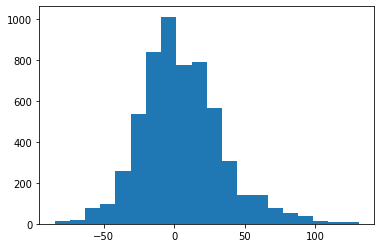

In [15]:
plt.hist(ozone['difference'],bins=20);

In [16]:
# substitution function
def ozone_sub(x):
    time = x[0]
    ozone = x[1]
    if pd.isna(ozone):
        time_plus_year = datetime(time.year+1,time.month,time.day,time.hour,time.minute,time.second)
        return weath_no_dupl[weath_no_dupl['time'] == time_plus_year]['ozone'].values[0]
    else:
        return ozone

In [17]:
# create checkpoint
weath_ozone = weath_no_dupl.copy()

In [18]:
# substitute missing ozone values
weath_ozone['ozone'] = weath_ozone[['time','ozone']].apply(ozone_sub, axis=1)

In [19]:
weath_ozone.head()

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,visibility,ozone
0,2019-01-01 23:00:00,3.20,-2.58,0.01,0.80,NaN,9.3,18.49,270.0,0.75,10.003,314.2
1,2019-01-02 00:00:00,2.20,-3.74,0.01,0.85,NaN,8.8,NaN,260.0,0.75,10.003,315.5
2,2019-01-02 01:00:00,2.20,-3.16,-1.01,0.79,NaN,7.2,NaN,240.0,0.75,10.003,315.7
3,2019-01-02 02:00:00,1.20,-4.46,0.01,0.92,NaN,7.2,NaN,240.0,0.75,2.003,316.5
4,2019-01-02 03:00:00,0.22,-5.72,0.01,0.99,NaN,7.2,NaN,240.0,0.75,1.498,318.5


In [21]:
# check what data is missing
weath_ozone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17390 entries, 0 to 2231
Data columns (total 12 columns):
time                   17390 non-null datetime64[ns]
temperature            17390 non-null float64
apparentTemperature    17390 non-null float64
dewPoint               17390 non-null float64
humidity               17390 non-null float64
pressure               14571 non-null float64
windSpeed              17219 non-null float64
windGust               14639 non-null float64
windBearing            17205 non-null float64
cloudCover             16384 non-null float64
visibility             17360 non-null float64
ozone                  17390 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 1.7 MB


In [22]:
# drop rows with missing data
# create checkpoint
weath_no_missing = weath_ozone.copy()#.dropna()

In [23]:
weath_no_missing.shape

(17390, 12)

In [24]:
weath_no_missing.head()

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,visibility,ozone
0,2019-01-01 23:00:00,3.20,-2.58,0.01,0.80,NaN,9.3,18.49,270.0,0.75,10.003,314.2
1,2019-01-02 00:00:00,2.20,-3.74,0.01,0.85,NaN,8.8,NaN,260.0,0.75,10.003,315.5
2,2019-01-02 01:00:00,2.20,-3.16,-1.01,0.79,NaN,7.2,NaN,240.0,0.75,10.003,315.7
3,2019-01-02 02:00:00,1.20,-4.46,0.01,0.92,NaN,7.2,NaN,240.0,0.75,2.003,316.5
4,2019-01-02 03:00:00,0.22,-5.72,0.01,0.99,NaN,7.2,NaN,240.0,0.75,1.498,318.5


In [25]:
# drop apparent temperature - for its calculation tempature, wind speed, and humidity are used 
# which are present in the dataset
weath_no_missing.drop(['apparentTemperature'], axis=1, inplace=True)

In [26]:
# turn windBearing into dummy variables
def wind_direction(direction):
    if direction > 45 and direction <= 135:
        return 1 # east wind
    elif direction > 135 and direction <= 225:
        return 2 # south wind
    elif direction > 225 and direction <= 315:
        return 3 # west wind
    else:
        return 0 # north wind
    
weath_no_missing['windBearing'] = weath_no_missing['windBearing'].apply(lambda direction: wind_direction(direction))
wind_bearing_columns = pd.get_dummies(weath_no_missing['windBearing'], drop_first = True)

In [27]:
# concatenate column values
# create checkpoint
weath_dummies = pd.concat([weath_no_missing,wind_bearing_columns], axis=1)

In [28]:
weath_dummies

,time,temperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,visibility,ozone,1,2,3
0,2019-01-01 23:00:00,3.20,0.01,0.80,NaN,9.30,18.49,3,0.75,10.003,314.2,0,0,1
1,2019-01-02 00:00:00,2.20,0.01,0.85,NaN,8.80,NaN,3,0.75,10.003,315.5,0,0,1
2,2019-01-02 01:00:00,2.20,-1.01,0.79,NaN,7.20,NaN,3,0.75,10.003,315.7,0,0,1
3,2019-01-02 02:00:00,1.20,0.01,0.92,NaN,7.20,NaN,3,0.75,2.003,316.5,0,0,1
4,2019-01-02 03:00:00,0.22,0.01,0.99,NaN,7.20,NaN,3,0.75,1.498,318.5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2020-12-29 18:00:00,4.95,1.20,0.77,1000.4,2.42,4.75,2,0.89,16.093,352.7,0,1,0
2228,2020-12-29 19:00:00,5.28,1.41,0.76,1000.3,2.37,4.76,2,0.93,16.093,352.2,0,1,0
2229,2020-12-29 20:00:00,5.27,1.53,0.77,1000.6,2.30,4.58,2,0.97,16.093,351.4,0,1,0
2230,2020-12-29 21:00:00,4.50,1.59,0.81,1001.2,2.22,4.33,2,0.90,16.093,351.0,0,1,0


In [29]:
# rename columns
weath_dummies.rename(columns={1: 'east_wind', 2: 'south_wind', 3: 'west_wind'}, inplace=True)

In [30]:
weath_dummies.sample(5)

,time,temperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,visibility,ozone,east_wind,south_wind,west_wind
3523,2020-03-29 18:00:00,7.30,1.87,0.68,1014.2,4.97,8.75,0,0.93,16.093,386.7,0,0,0
5111,2020-07-30 21:00:00,18.34,10.73,0.61,1018.7,1.08,1.36,2,0.06,16.093,302.7,0,1,0
501,2020-08-25 19:00:00,16.91,10.93,0.68,1014.2,1.23,1.64,3,0.22,16.093,291.8,0,0,1
3146,2019-12-17 01:00:00,2.75,1.67,0.93,1014.1,0.95,1.94,2,0.93,16.093,296.7,0,1,0
2425,2020-09-25 23:00:00,16.15,14.12,0.88,994.0,2.54,2.56,1,0.92,16.093,264.0,1,0,0


In [31]:
# drop wind bearing feature
weath_dummies.drop(['windBearing'], axis = 1, inplace = True)

In [32]:
# save the preprocessed data as csv
weath_dummies.to_csv('Weather_Data_Preprocessed_1.csv')

In [33]:
# read the Smog dataset
smog = pd.read_csv('Smog_Data_Preprocessed.csv', index_col=0)

In [34]:
type(smog['Date'][0])

str

In [35]:
# change the date format to datetime
smog['Date'] = pd.to_datetime(smog['Date'],format = '%Y-%m-%d %H:%M:%S')

In [36]:
# join weather and smog datasets on timestamps
# drop Date column
weath_smog = pd.merge(weath_dummies,smog,left_on='time',right_on='Date')
weath_smog.drop(['Date'],axis=1,inplace=True)

In [37]:
# save the preprocessed data as csv
weath_smog.to_csv('Weather_Smog_Data_Preprocessed_1.csv')